# FOOD ORDER PREDICTION 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [2]:
dataset = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/onlinefoods.csv',
                     skipinitialspace=True)
dataset.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [4]:
dataset.nunique()

Age                           16
Gender                         2
Marital Status                 3
Occupation                     4
Monthly Income                 5
Educational Qualifications     5
Family size                    6
latitude                      77
longitude                     76
Pin code                      77
Output                         2
Feedback                       2
Unnamed: 12                    2
dtype: int64

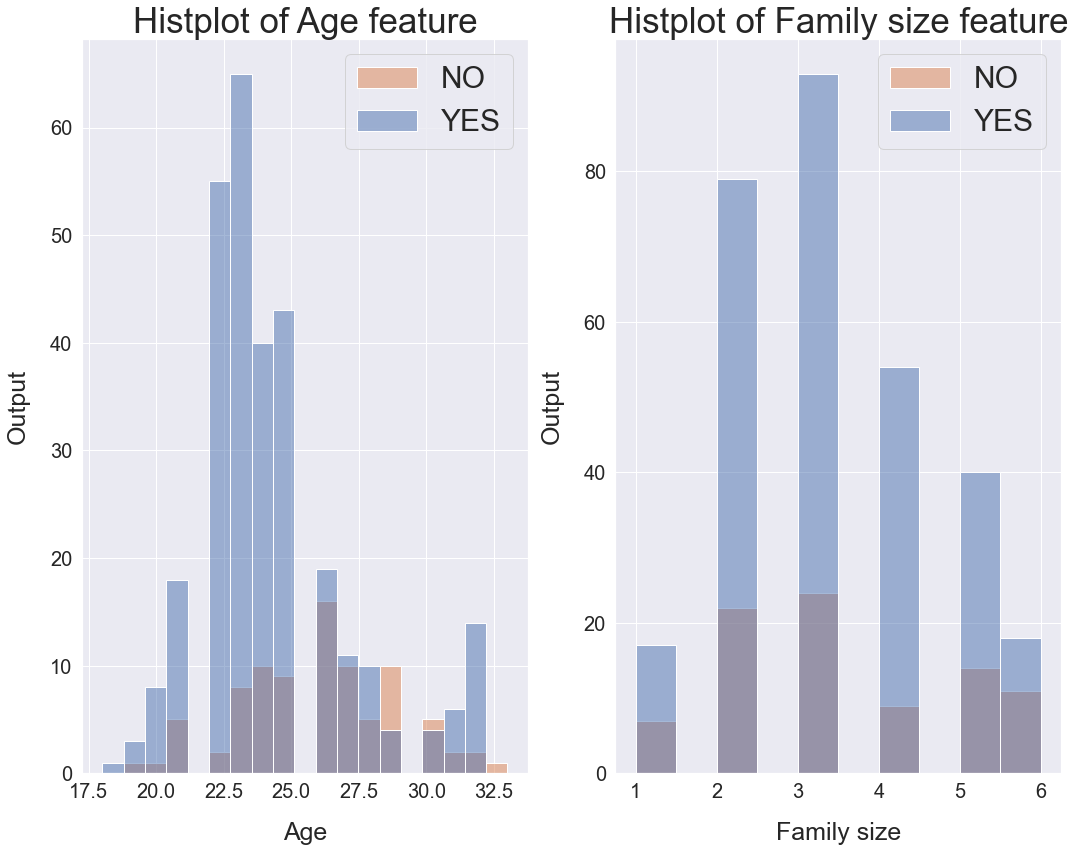

In [5]:
hist_feature = ('Age', 'Family size')
fig, axs = plt.subplots(1, 2, figsize=(15,12))
plt.subplots_adjust(right=1.5, top=1.25)
for i, feature in enumerate(hist_feature,1):
    plt.subplot(1,2,i)
    sns.histplot(x=feature, hue='Output', data=dataset)
    plt.xlabel('{}'.format(feature), size=25, labelpad=20)
    plt.ylabel('Output', size=25, labelpad=20)
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)
    plt.legend(['NO', 'YES'], loc='upper right', prop={'size':30})
    plt.title('Histplot of {} feature'.format(feature), size=35)
plt.tight_layout()
plt.show()

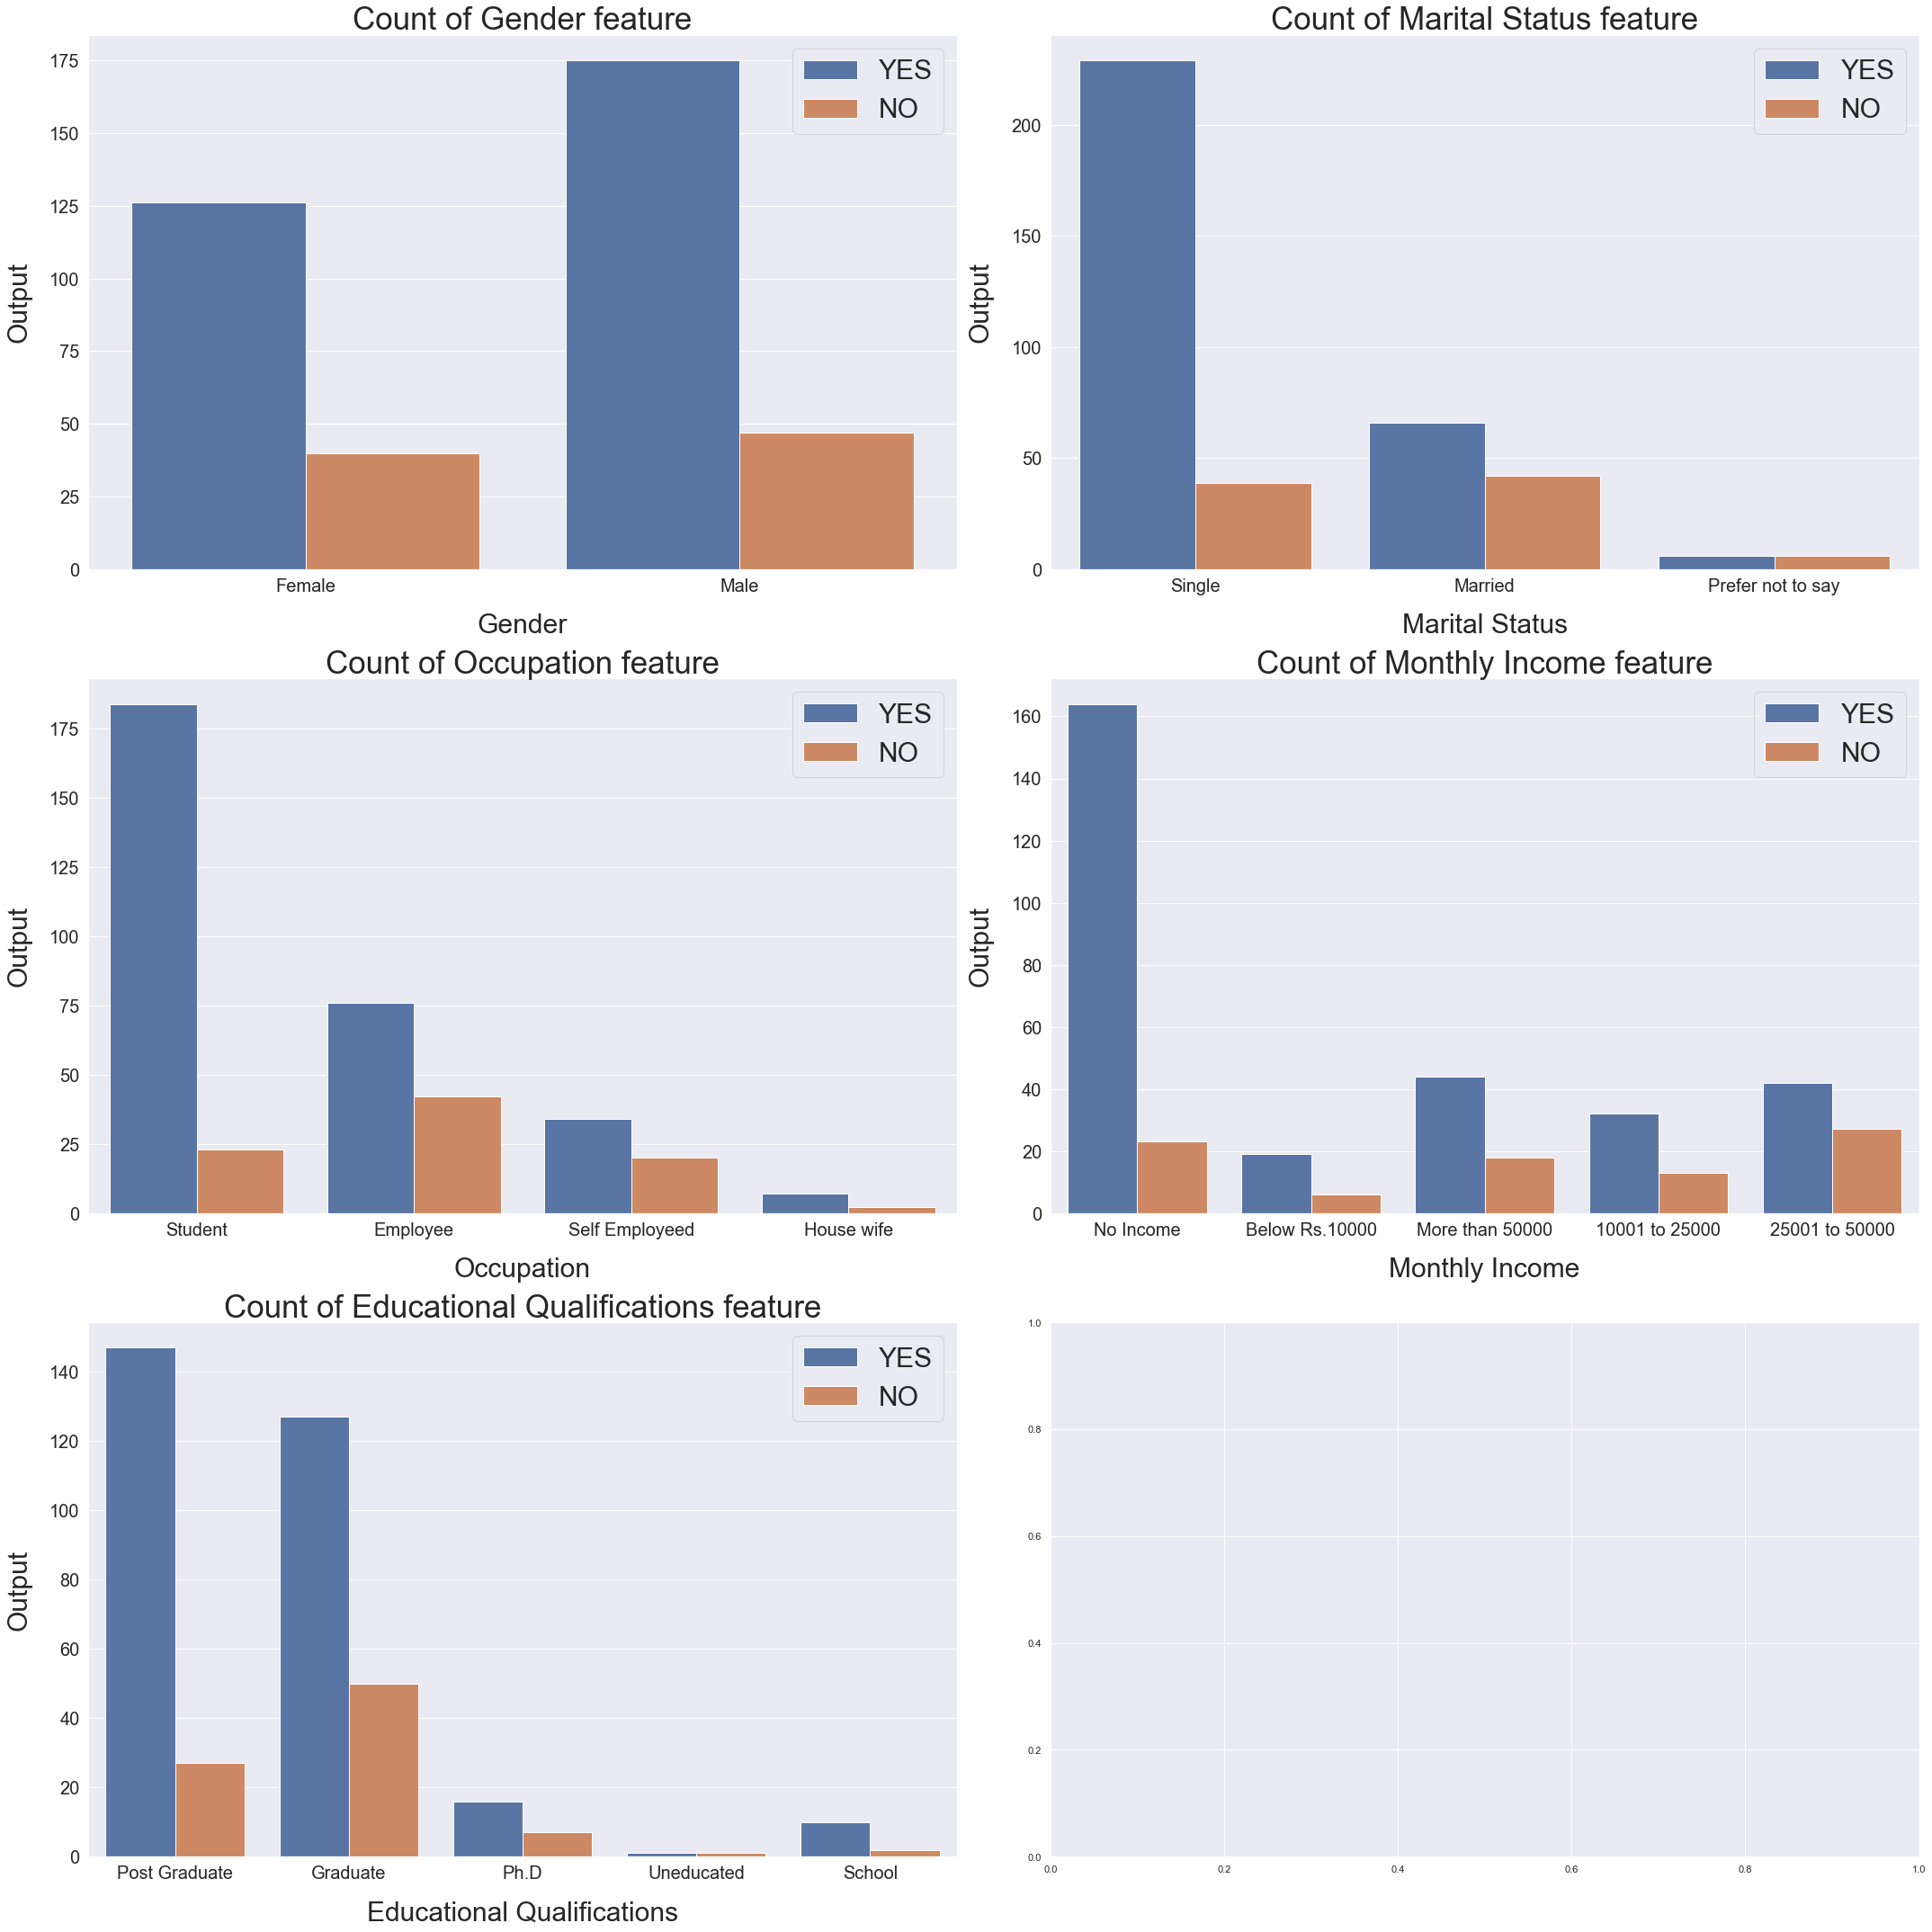

In [6]:
count_feature = ('Gender', 'Marital Status', 'Occupation', 'Monthly Income', 'Educational Qualifications')
fig, axs = plt.subplots(3,2,figsize=(30,30))
plt.subplots_adjust(right=1.5, top=1.25)
for i, feature in enumerate (count_feature,1):
    plt.subplot(3,2,i)
    sns.countplot(x=feature, hue='Output', data=dataset)
    plt.xlabel('{}'.format(feature), size=30, labelpad=20)
    plt.ylabel('Output', size=30, labelpad=20)
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)
    plt.legend(['YES','NO'], loc='upper right', prop={'size':30})
    plt.title('Count of {} feature'.format(feature), size=35)
plt.tight_layout()
plt.show()

In [7]:
dataset['Gender'] = dataset['Gender'].map({'Male':1, 'Female':0})
dataset['Marital Status'] = dataset['Marital Status'].map({'Married':2, 'Single':1, 'Prefer not to say':0})
dataset['Occupation'] = dataset['Occupation'].map({'Student':1, 'Employee':2, 'Self Employeed':3, 'House wife':4})
dataset['Educational Qualifications'] = dataset['Educational Qualifications'].map({'Uneducated':0, 'School':1, 'Graduate':2,
                                                                                  'Post Graduate':3, 'Ph.D':4})
dataset['Monthly Income'] = dataset['Monthly Income'].map({'No Income':0, 'Below Rs.10000':1, '10001 to 25000':2,
                                                           '25001 to 50000':3, 'More than 50000':4})
dataset['Feedback'] = dataset['Feedback'].map({'Positive':1, 'Negative ':0})
dataset.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,0,1,1,0,3,4,12.9766,77.5993,560001,Yes,1,Yes
1,24,0,1,1,1,2,3,12.9770,77.5773,560009,Yes,1,Yes
2,22,1,1,1,1,3,3,12.9551,77.6593,560017,Yes,0,Yes
3,22,0,1,1,0,2,6,12.9473,77.5616,560019,Yes,1,Yes
4,22,1,1,1,1,3,4,12.9850,77.5533,560010,Yes,1,Yes


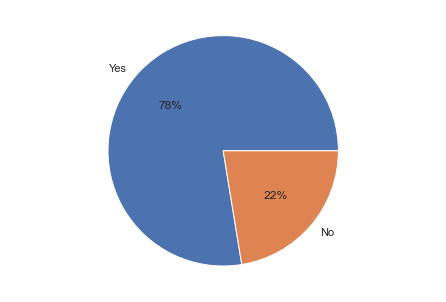

In [8]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.axis('equal')
labels=['Yes', 'No']
order = dataset.Output.value_counts()
ax.pie(order, labels=labels, autopct='%.0f%%')
plt.show()

In [9]:
x = np.array(dataset[['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income', 'Educational Qualifications',
                     'Family size', 'Pin code', 'Feedback']])
y = np.array(dataset[['Output']])
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=42)

In [10]:
sm = SMOTE(sampling_strategy='auto', random_state=42)
x_train,y_train = sm.fit_resample(xtrain,ytrain)

In [11]:
s = pd.Series(data=y_train)
s.value_counts()

Yes    235
No     235
dtype: int64

C:\Users\Reskur\anaconda3\envs\dqlabml_iki\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


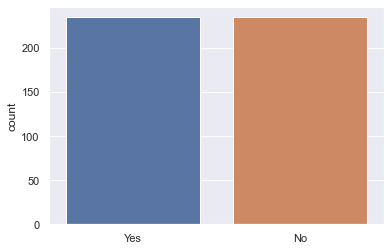

In [12]:
sns.countplot(s)
plt.show()

In [13]:
model=RandomForestClassifier()
model.fit(x_train, y_train.ravel())
y_pred = model.predict(xtest)
print(f'Model Accuracy: {accuracy_score(y_pred, ytest)*100:.2f}%')

Model Accuracy: 87.18%


In [14]:
print('classidication report \n')
print(classification_report(ytest, y_pred))

classidication report 

              precision    recall  f1-score   support

          No       0.57      0.67      0.62        12
         Yes       0.94      0.91      0.92        66

    accuracy                           0.87        78
   macro avg       0.75      0.79      0.77        78
weighted avg       0.88      0.87      0.88        78



In [15]:
print('Enter Customers Details to Predict if Customers Will Order Again')
a=int(input('Enter the age of customers: '))
b=int(input('Enter the gender of customers (0 = female, 1 = male): '))
c=int(input('Enter Marital Status of Customers ( 0 = Prefer Not to Say, 1 = Single, 2 = Married): '))
d=int(input('Enter Occupation of Customers (1 = Student, 2 = Employee, 3 = Self Employeed, 4 = House Wife): '))
e=int(input('Enter Montly Income of Customers (0 = No Income, 1 = Below Rs.10000, 2 = 10001 to 25000, 3 = 25001 to 50000, , 4 = More than 50000, ): '))
f=int(input('Enter Educational Qualification of Customers (0 = Uneducated, 1 = School, 2 = Graduate, 3 = Post Graduate, 4 = Ph.D ): '))
g=int(input('Enter Pin Code of Customers: '))
h=int(input('Enter Family Size of Customers: '))
i=int(input('Enter last review of the customers (0 = Negative), 1 = Postive):' ))

features = np.array([[a,b,c,d,e,f,g,h,i]])
print ('finding if the customers will order again', model.predict(features))

Enter Customers Details to Predict if Customers Will Order Again
Enter the age of customers: 17
Enter the gender of customers (0 = female, 1 = male): 0
Enter Marital Status of Customers ( 0 = Prefer Not to Say, 1 = Single, 2 = Married): 2
Enter Occupation of Customers (1 = Student, 2 = Employee, 3 = Self Employeed, 4 = House Wife): 4
Enter Montly Income of Customers (0 = No Income, 1 = Below Rs.10000, 2 = 10001 to 25000, 3 = 25001 to 50000, , 4 = More than 50000, ): 4
Enter Educational Qualification of Customers (0 = Uneducated, 1 = School, 2 = Graduate, 3 = Post Graduate, 4 = Ph.D ): 2
Enter Pin Code of Customers: 560001
Enter Family Size of Customers: 2
Enter last review of the customers (0 = Negative), 1 = Postive):0
finding if the customers will order again ['No']
